<IPython.core.display.Javascript object>


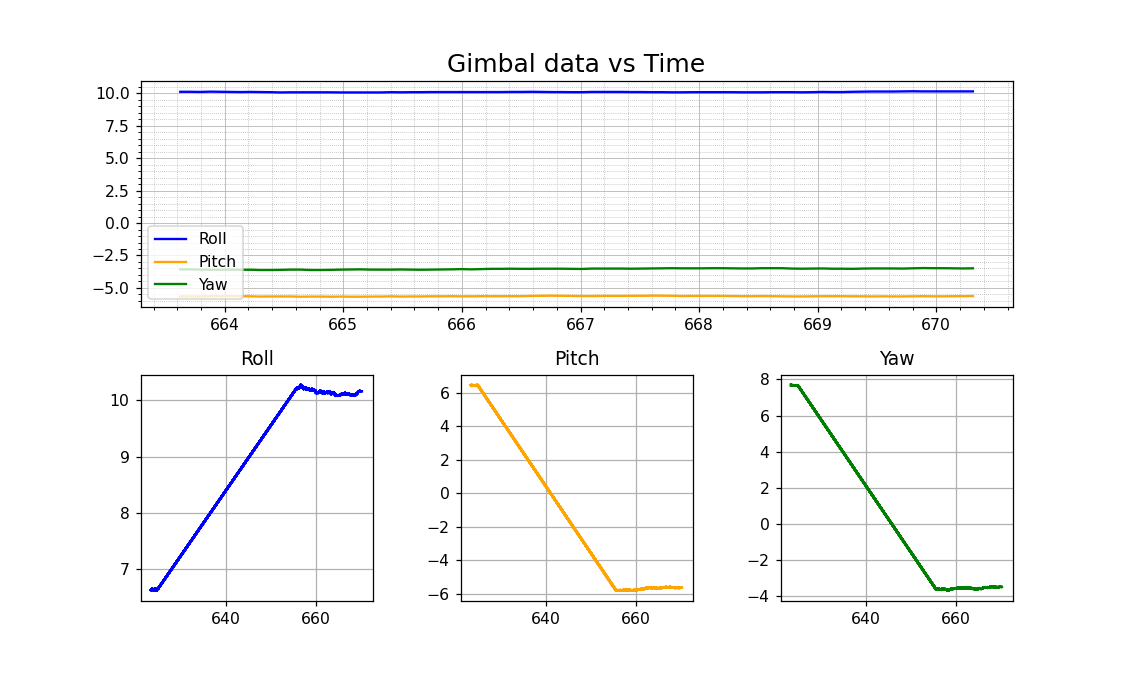

In [8]:
from matplotlib import pyplot as plt
from matplotlib import animation as animation
import time
from Gimbal_data import get_data
%matplotlib notebook

fig = plt.figure(figsize=(10, 6))
#fig.suptitle("MPU6050 data vs Time")
ax = fig.add_subplot(2, 1, 1)
ax.grid(True)
#ax.set_ylim([-180, 180])         #Not working at setting the y-axis limits
time1 = []
roll1 = []
pitch1 = []
yaw1 = []
#ax.set_title("MPU6050 data vs Time")
plt.subplots_adjust(hspace=0.3, wspace=0.38)



a2 = fig.add_subplot(2, 3, 4)
a2.set_title("Roll")
a2.grid(True)
a3 = fig.add_subplot(2, 3, 5)
a3.set_title("Pitch")
a3.grid(True)
a4 = fig.add_subplot(2, 3, 6)
a4.set_title("Yaw")
a4.grid(True)

def animate(i, time1, roll1, pitch1, yaw1):
    roll, pitch, yaw, time = get_data()
    print(roll)

    time1.append(time / 1000)
    roll1.append(roll)
    pitch1.append(pitch)
    yaw1.append(yaw)

    time1 = time1[-80:]
    roll1 = roll1[-80:]
    pitch1 = pitch1[-80:]
    yaw1 = yaw1[-80:]

    ax.clear()
    ax.plot(time1, roll1, label="Roll", color="blue")
    ax.plot(time1, pitch1, label="Pitch", color="orange")      #Remove the color constraints and try and find those colours instead as better
    ax.plot(time1, yaw1, label="Yaw", color="green")
    ax.set_title("Gimbal data vs Time", fontsize=16)
    
    a2.plot(time1[-40:], roll1[-40:], color="blue")
    a3.plot(time1[-40:], pitch1[-40:], color="orange")
    a4.plot(time1[-40:], yaw1[-40:], color="green")
            
    
    ax.minorticks_on()       #Allowing for smaller gridlines
    ax.grid(which='major', linestyle='-', linewidth='0.5')
    ax.grid(which='minor', linestyle=':', linewidth='0.5')
    ax.grid(True)
    
    ax.legend(loc=3)

ani = animation.FuncAnimation(fig, animate, fargs=(time1, roll1, pitch1, yaw1), interval=10)    #frame rate limited by other factors
plt.show(block=False)

<IPython.core.display.Javascript object>


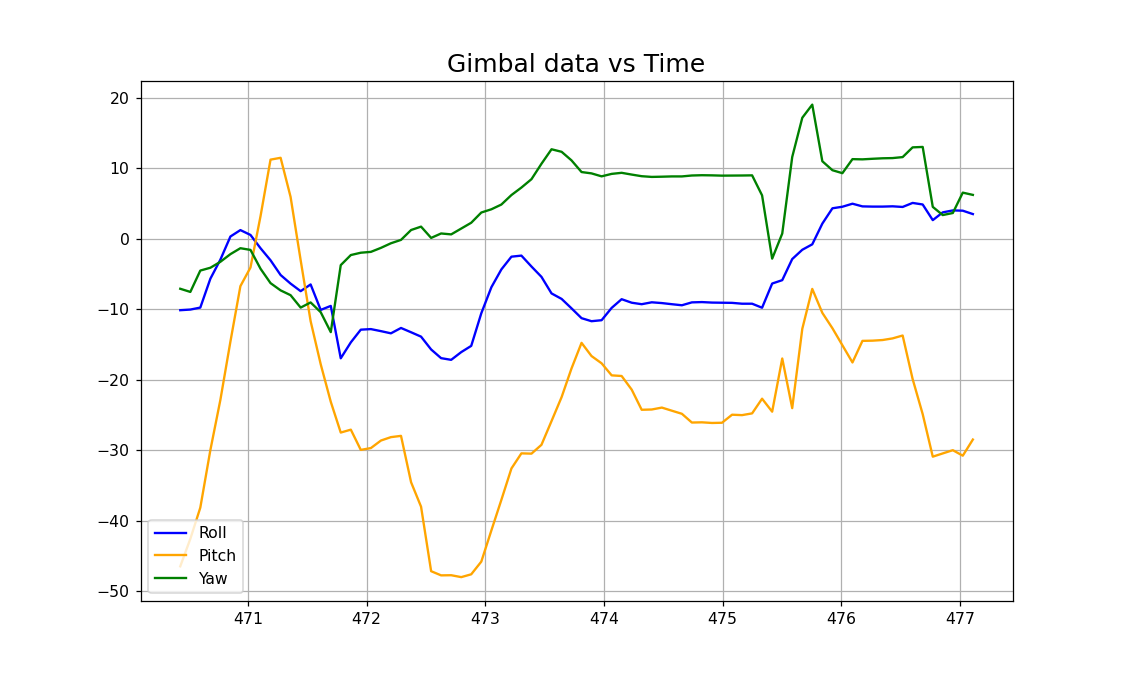

In [4]:
from matplotlib import pyplot as plt
from matplotlib import animation as animation
import time
#import serial
#import string
from Gimbal_data import get_data
%matplotlib notebook

"""
ser = serial.Serial(port="COM3", baudrate=9600, timeout=1)
time.sleep(2)           #Wait while the arduino initialises
ready_for_data = False

while ready_for_data == False:
    data = str(ser.readline())
    if data[2] == '-' or data[2] in string.digits:#May need to change this to be looking for numbers
        ready_for_data = True
    else:
        time.sleep(1)  # Waiting for the calibration process to end and the data to start streaming

def get_data():
    roll, pitch, yaw, timePoint = ser.readline().decode().replace('\r\n', '').split(",")
    data_list = [roll, pitch, yaw, timePoint]
    return [float(i) for i in data_list]"""

fig = plt.figure(figsize=(10, 6))
#fig.suptitle("MPU6050 data vs Time")
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
#ax.set_ylim([-180, 180])         #Not working at setting the y-axis limits
time1 = []
roll1 = []
pitch1 = []
yaw1 = []

def animate(i, time1, roll1, pitch1, yaw1):
    roll, pitch, yaw, time = get_data()

    if time > 10000:
        time1.append(time / 1000)
        roll1.append(roll)
        pitch1.append(pitch)
        yaw1.append(yaw)

    time1 = time1[-80:]
    roll1 = roll1[-80:]
    pitch1 = pitch1[-80:]
    yaw1 = yaw1[-80:]

    ax.clear()
    ax.plot(time1, roll1, label="Roll", color="blue")
    ax.plot(time1, pitch1, label="Pitch", color="orange")      #Remove the color constraints and try and find those colours instead as better
    ax.plot(time1, yaw1, label="Yaw", color="green")
    ax.set_title("Gimbal data vs Time", fontsize=16)
    
    """
    ax.minorticks_on()       #Allowing for smaller gridlines
    ax.grid(which='major', linestyle='-', linewidth='0.5')
    ax.grid(which='minor', linestyle=':', linewidth='0.5')
    ax.grid(True)"""
    
    ax.legend(loc=3)
    ax.grid(True)

ani = animation.FuncAnimation(fig, animate, blit=True, fargs=(time1, roll1, pitch1, yaw1), interval=10)    #frame rate limited by other factors
plt.show(block=False)